In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\saran\Desktop\Internship\Project1\Shark Tank India.csv")

In [3]:
df.head(5)

,Unnamed: 0,Episode Number,Pitch Number,Company,Idea,Industry,Amount,Debt,Equity,Ashneer,Anupam,Namita,Aman,Vineeta,Peyush,Ghazal
0,1,1,1,BluePine Industries,Frozen Momos,Food,7500000.0,0.0,0.18,1,0,0,1,1,0,0
1,2,1,2,Booz scooters,Renting e-bike for mobility in private spaces,Bikes,4000000.0,0.0,0.50,1,0,0,0,1,0,0
2,3,1,3,Heart up my Sleeves,Detachable Sleeves,Fashion/Beauty,2500000.0,0.0,0.30,0,1,0,0,1,0,0
3,4,2,4,Tagz Foods,Healthy Potato Chips,Food,7000000.0,0.0,0.03,1,0,0,0,0,0,0
4,5,2,5,Head and Heart,Brain Development Course,Education Technology,0.0,0.0,0.00,0,0,0,0,0,0,0


In [4]:
df.tail(5)

,Unnamed: 0,Episode Number,Pitch Number,Company,Idea,Industry,Amount,Debt,Equity,Ashneer,Anupam,Namita,Aman,Vineeta,Peyush,Ghazal
112,113,34,113,Green Protein,Plant-Based Protein,Food,0.0,0.0,0.0,0,0,0,0,0,0,0
113,114,34,114,On2Cook,Fastest Cooking Device,Food,0.0,0.0,0.0,0,0,0,0,0,0,0
114,115,35,115,Jain Shikanji,Lemonade,Food,4000000.0,0.0,0.3,1,1,0,1,1,0,0
115,116,35,116,Woloo,Washroom Finder,Technology,0.0,0.0,0.0,0,0,0,0,0,0,0
116,117,35,117,Elcare India,Carenting for Elders,Healthcare,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      117 non-null    int64  
 1   Episode Number  117 non-null    int64  
 2   Pitch Number    117 non-null    int64  
 3   Company         117 non-null    object 
 4   Idea            117 non-null    object 
 5   Industry        117 non-null    object 
 6   Amount          117 non-null    float64
 7   Debt            117 non-null    float64
 8   Equity          117 non-null    float64
 9   Ashneer         117 non-null    int64  
 10  Anupam          117 non-null    int64  
 11  Namita          117 non-null    int64  
 12  Aman            117 non-null    int64  
 13  Vineeta         117 non-null    int64  
 14  Peyush          117 non-null    int64  
 15  Ghazal          117 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 14.8+ KB


In [6]:
df.shape

(117, 16)

In [7]:
df.isnull().sum()

Unnamed: 0        0
Episode Number    0
Pitch Number      0
Company           0
Idea              0
Industry          0
Amount            0
Debt              0
Equity            0
Ashneer           0
Anupam            0
Namita            0
Aman              0
Vineeta           0
Peyush            0
Ghazal            0
dtype: int64

In [8]:
df=df.drop(columns=["Unnamed: 0"])

In [9]:
df.rename(columns={"Amount":"Investment"},inplace="True")

In [10]:
df["Deal_status"]=np.where(df["Investment"]>0,"Funded","Not Funded")

In [11]:
shark_cols=["Ashneer","Anupam","Namita","Aman","Vineeta","Peyush","Ghazal"]
df["Num_Investors"] = (df[shark_cols] > 0).sum(axis=1)


In [12]:
df.head(5)

,Episode Number,Pitch Number,Company,Idea,Industry,Investment,Debt,Equity,Ashneer,Anupam,Namita,Aman,Vineeta,Peyush,Ghazal,Deal_status,Num_Investors
0,1,1,BluePine Industries,Frozen Momos,Food,7500000.0,0.0,0.18,1,0,0,1,1,0,0,Funded,3
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,Bikes,4000000.0,0.0,0.50,1,0,0,0,1,0,0,Funded,2
2,1,3,Heart up my Sleeves,Detachable Sleeves,Fashion/Beauty,2500000.0,0.0,0.30,0,1,0,0,1,0,0,Funded,2
3,2,4,Tagz Foods,Healthy Potato Chips,Food,7000000.0,0.0,0.03,1,0,0,0,0,0,0,Funded,1
4,2,5,Head and Heart,Brain Development Course,Education Technology,0.0,0.0,0.00,0,0,0,0,0,0,0,Not Funded,0


In [13]:
industry_counts = df["Industry"].value_counts()
print("\nTop Industries:\n", industry_counts.head())


Top Industries:
 Industry
Food              38
Fashion/Beauty    16
Technology        15
Bikes              6
Healthcare         5
Name: count, dtype: int64


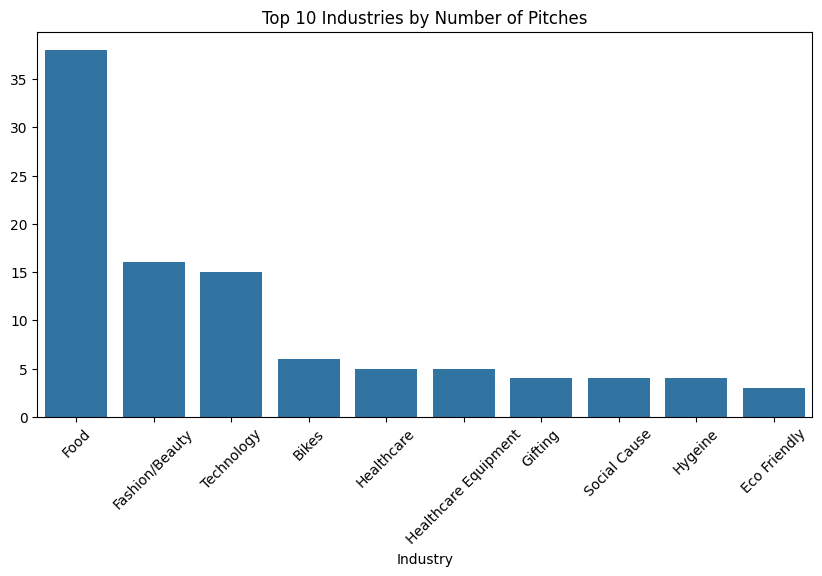

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=industry_counts.index[:10], y=industry_counts.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Industries by Number of Pitches")
plt.show()


Deal Success Rate:
 Deal_status
Funded        55.555556
Not Funded    44.444444
Name: proportion, dtype: float64


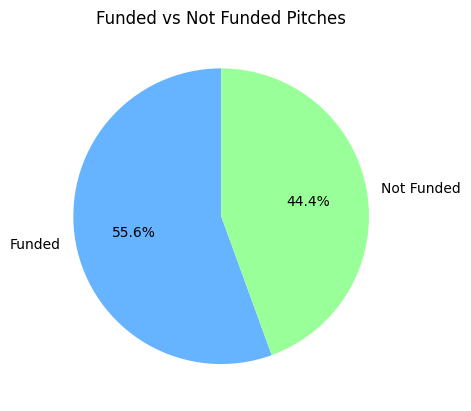

In [15]:
deal_status = df["Deal_status"].value_counts(normalize=True) * 100
print("\nDeal Success Rate:\n", deal_status)

plt.pie(deal_status.values, labels=deal_status.index, autopct="%.1f%%", startangle=90, colors=["#66b3ff","#99ff99"])
plt.title("Funded vs Not Funded Pitches")
plt.show()


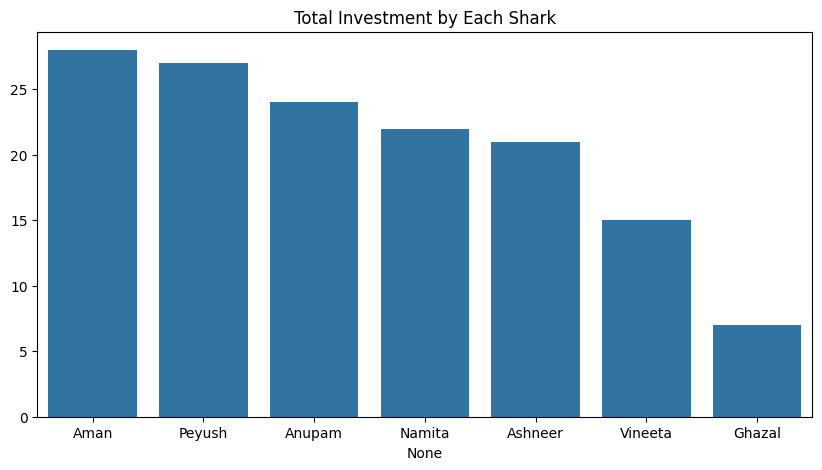

In [16]:
shark_cols = ["Ashneer", "Namita", "Peyush", "Aman", "Anupam", "Vineeta", "Ghazal"]
shark_investments = df[shark_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=shark_investments.index, y=shark_investments.values)
plt.title("Total Investment by Each Shark")
plt.show()

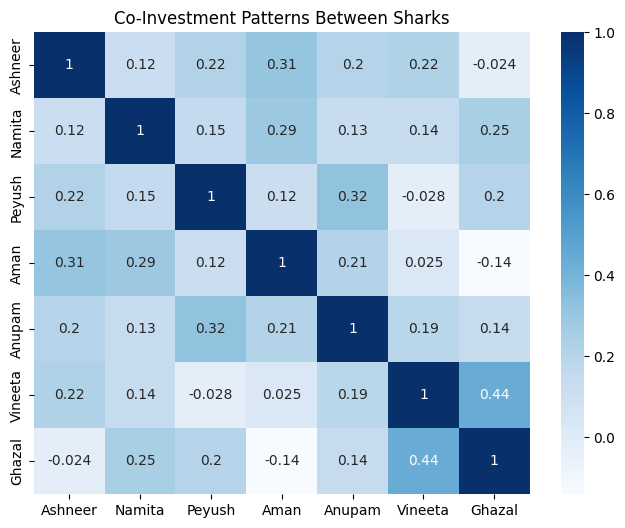

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df[shark_cols].corr(), annot=True, cmap="Blues")
plt.title("Co-Investment Patterns Between Sharks")
plt.show()


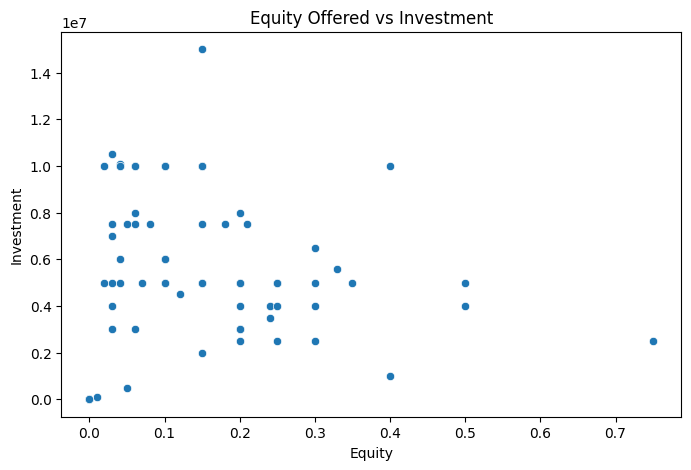

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Equity", y="Investment", data=df)
plt.title("Equity Offered vs Investment")
plt.show()


In [21]:
df.to_csv("Shark_tank_cleaned.csv",index=False)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Episode Number  117 non-null    int64  
 1   Pitch Number    117 non-null    int64  
 2   Company         117 non-null    object 
 3   Idea            117 non-null    object 
 4   Industry        117 non-null    object 
 5   Investment      117 non-null    float64
 6   Debt            117 non-null    float64
 7   Equity          117 non-null    float64
 8   Ashneer         117 non-null    int64  
 9   Anupam          117 non-null    int64  
 10  Namita          117 non-null    int64  
 11  Aman            117 non-null    int64  
 12  Vineeta         117 non-null    int64  
 13  Peyush          117 non-null    int64  
 14  Ghazal          117 non-null    int64  
 15  Deal_status     117 non-null    object 
 16  Num_Investors   117 non-null    int64  
dtypes: float64(3), int64(10), object(4)